In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir = "/v/Data/cyto/ChannelOne/"
# datadir = "/home/cjw/disk2cjw/Data/cyto/mmFromTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/ChannelOne/Fish3_9.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_15.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_ice_21.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_CCB_14.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_13.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_ice_22.tif.mm', '/v/Data/cyto/ChannelOne/Fish3_ice_19.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_CCB_16.tif.mm']
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
80000


dict_keys(['Fish3_9.tif.mm', 'Fish6_15.tif.mm', 'Fish5_ice_21.tif.mm', 'Fish5_CCB_14.tif.mm', 'Fish5_13.tif.mm', 'Fish6_ice_22.tif.mm', 'Fish3_ice_19.tif.mm', 'Fish6_CCB_16.tif.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 64), dtype=float32)
isize:  4 32
dh0 (?, 32, 32, 1)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("Minimum:0", shape=(?, 32, 32, 1), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
80000 625 128
Epoch:  0 Iteration:  0 Loss:  264.07745 4.671655 0.33761674


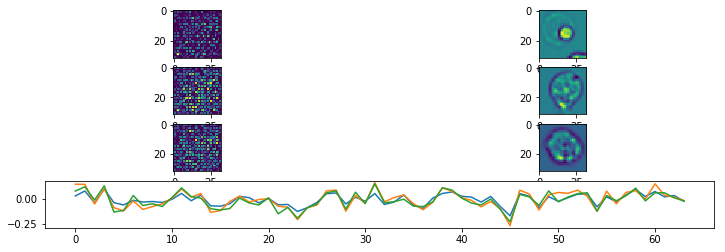

Epoch:  0 Iteration:  500 Loss:  9.089781 0.6945759 0.0030117333


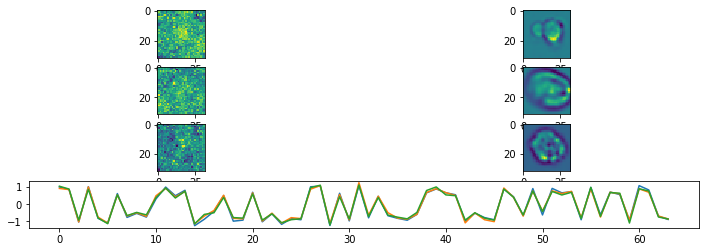

Epoch:  1 Iteration:  0 Loss:  8.905119 0.69519407 0.012566984


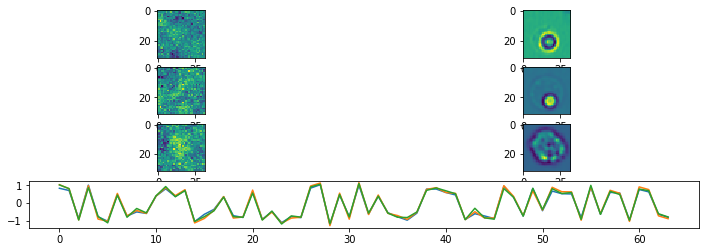

Epoch:  1 Iteration:  500 Loss:  7.416855 0.69129795 0.0024298728


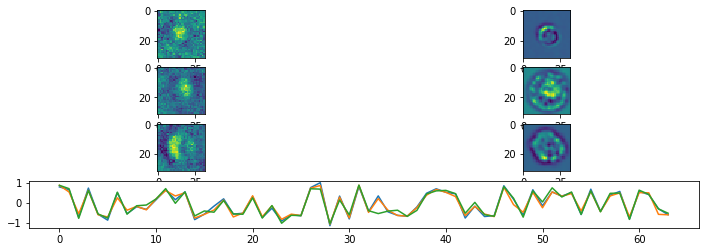

Epoch:  2 Iteration:  0 Loss:  7.8715687 0.69316757 0.014016181


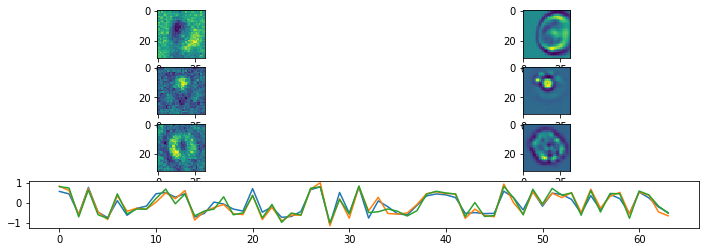

Epoch:  2 Iteration:  500 Loss:  5.3502254 0.68719256 0.004369408


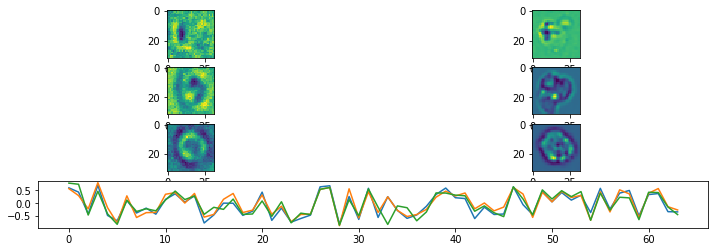

Epoch:  3 Iteration:  0 Loss:  5.365607 0.6882065 0.0021316707


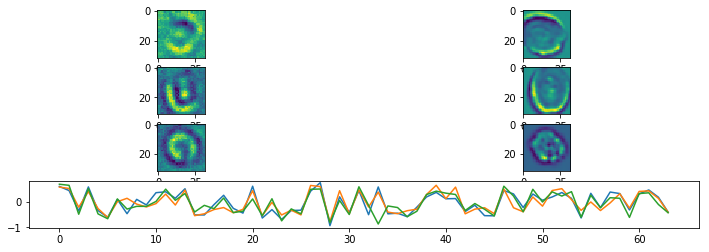

Epoch:  3 Iteration:  500 Loss:  4.5933847 0.68566144 0.0071212947


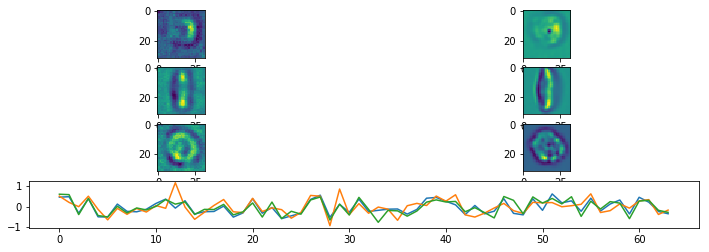

Epoch:  4 Iteration:  0 Loss:  4.2454634 0.68594784 0.0040567815


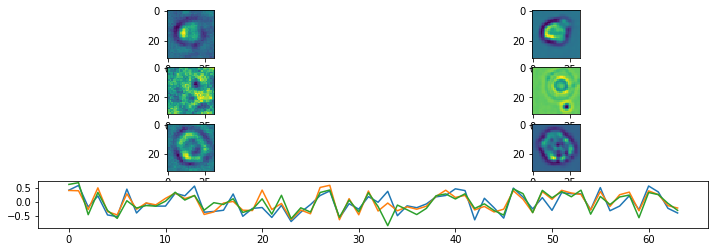

Epoch:  4 Iteration:  500 Loss:  3.726095 0.68387973 0.0016036332


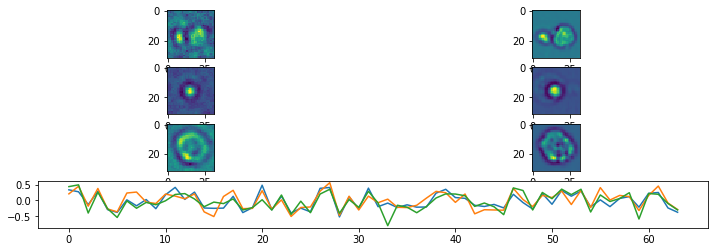

Epoch:  5 Iteration:  0 Loss:  3.7389698 0.6848907 0.0010456145


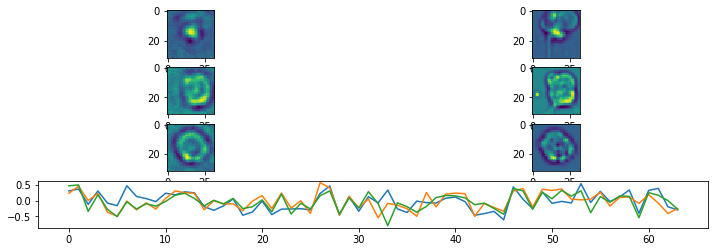

Epoch:  5 Iteration:  500 Loss:  3.4010258 0.6832727 0.0016230643


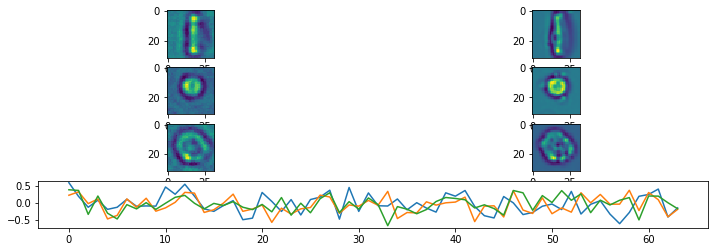

Epoch:  6 Iteration:  0 Loss:  3.526322 0.68450326 0.0044370294


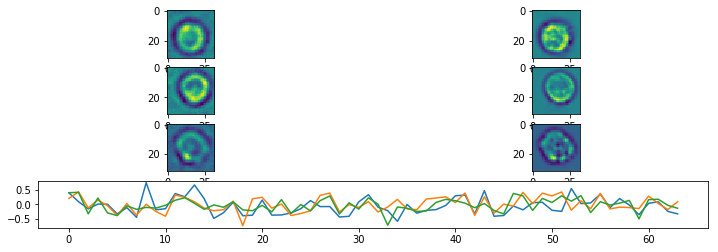

Epoch:  6 Iteration:  500 Loss:  3.1297247 0.6827036 0.0012643635


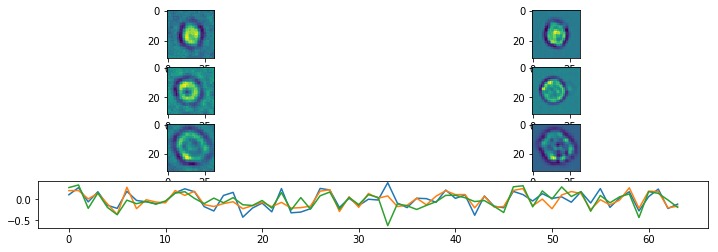

Epoch:  7 Iteration:  0 Loss:  3.2871997 0.68405783 0.00076401234


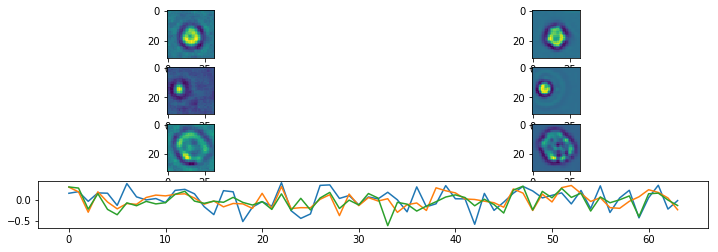

Epoch:  7 Iteration:  500 Loss:  2.9772377 0.682369 0.0015957057


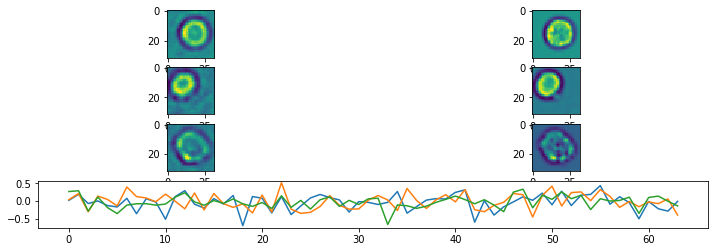

Epoch:  8 Iteration:  0 Loss:  3.0538473 0.6835469 0.0026132166


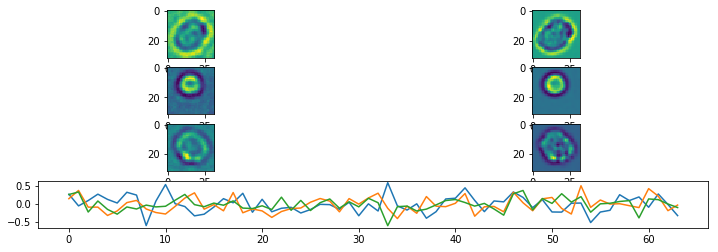

Epoch:  8 Iteration:  500 Loss:  2.8497987 0.68212706 0.0020128787


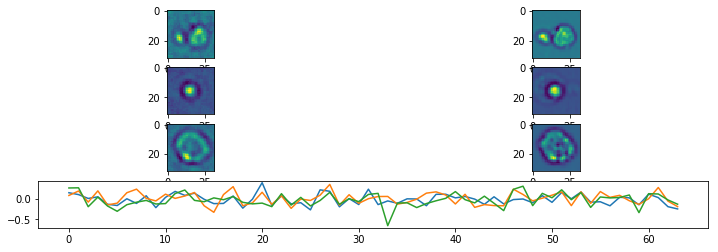

Epoch:  9 Iteration:  0 Loss:  2.9295115 0.68333256 0.00063192844


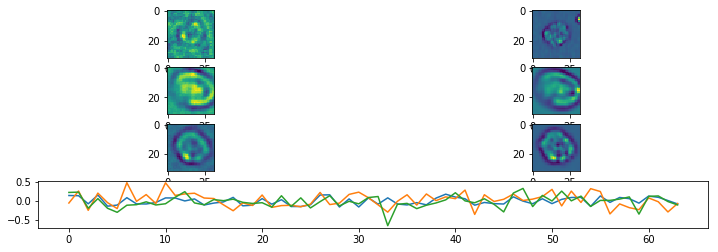

Epoch:  9 Iteration:  500 Loss:  2.7666078 0.68193454 0.0023735464


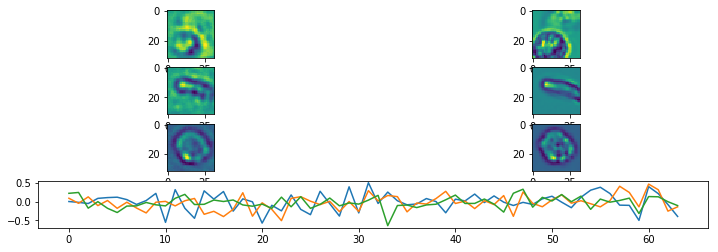

Epoch:  10 Iteration:  0 Loss:  2.8460073 0.6831115 0.0021317303


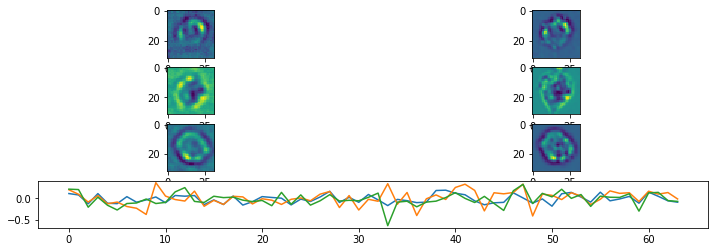

Epoch:  10 Iteration:  500 Loss:  2.673908 0.6817744 0.00059089065


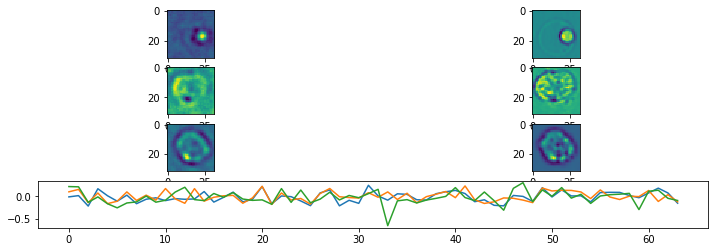

Epoch:  11 Iteration:  0 Loss:  2.757565 0.68299663 0.0006057322


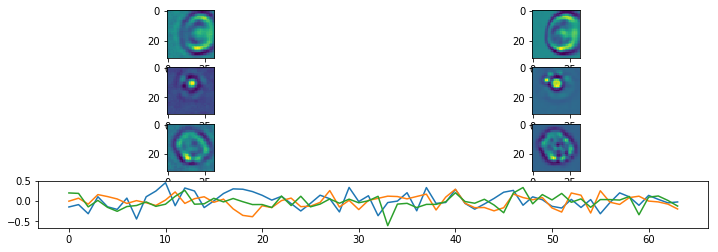

Epoch:  11 Iteration:  500 Loss:  2.6051195 0.6816015 0.0013517439


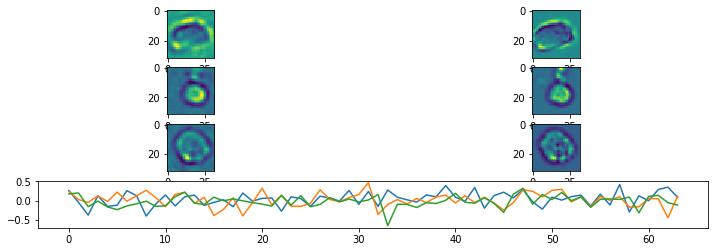

Epoch:  12 Iteration:  0 Loss:  2.699833 0.68288124 0.0009584129


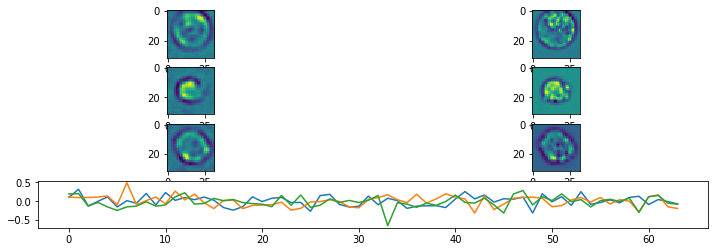

Epoch:  12 Iteration:  500 Loss:  2.576509 0.68150723 0.00048163533


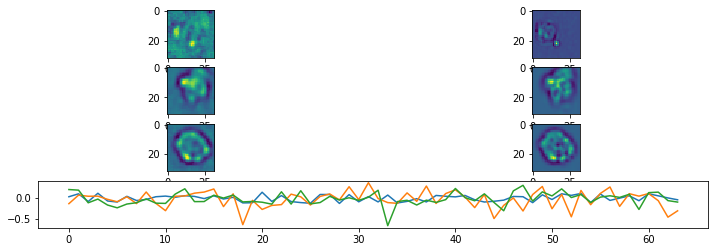

Epoch:  13 Iteration:  0 Loss:  2.630331 0.68275464 0.00055506825


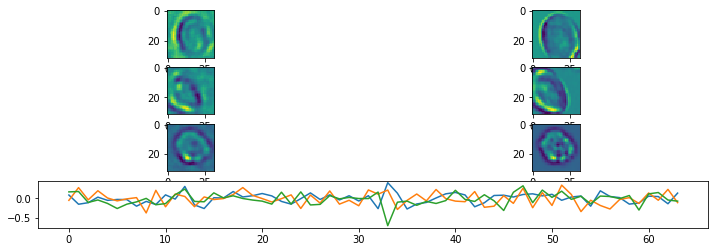

Epoch:  13 Iteration:  500 Loss:  2.5388484 0.6814423 0.0028724372


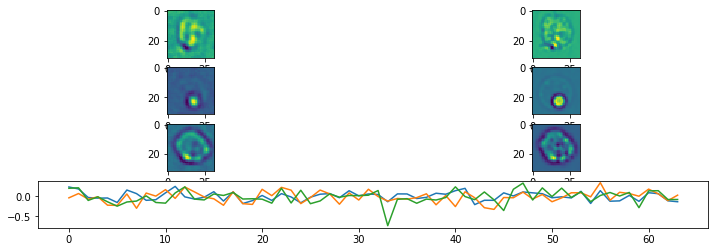

Epoch:  14 Iteration:  0 Loss:  2.5837798 0.682613 0.0008010268


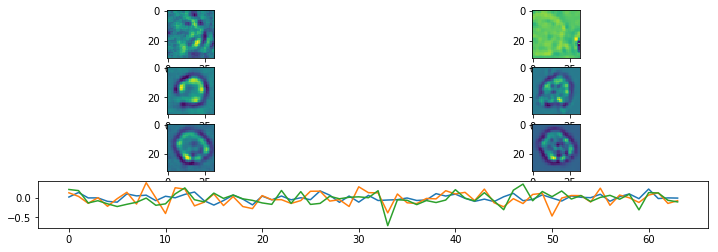

Epoch:  14 Iteration:  500 Loss:  2.4525323 0.6812373 5.5491924e-05


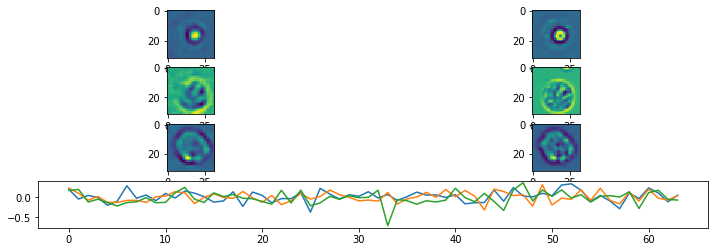

Epoch:  15 Iteration:  0 Loss:  2.5237794 0.6824934 0.0010046065


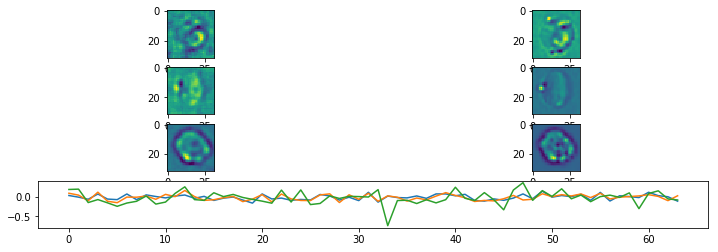

Epoch:  15 Iteration:  500 Loss:  2.4002032 0.6810608 0.0017734468


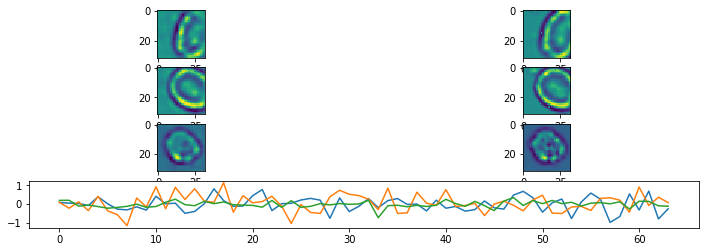

Epoch:  16 Iteration:  0 Loss:  2.4747448 0.68237233 0.0015851855


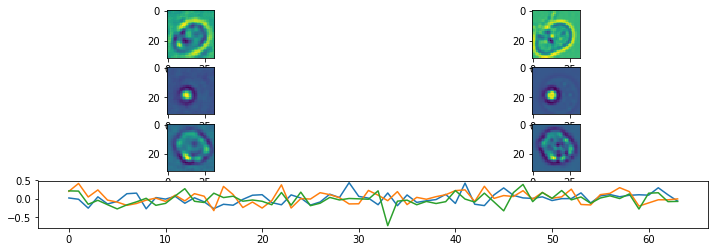

Epoch:  16 Iteration:  500 Loss:  2.3634753 0.68106997 0.0006068051


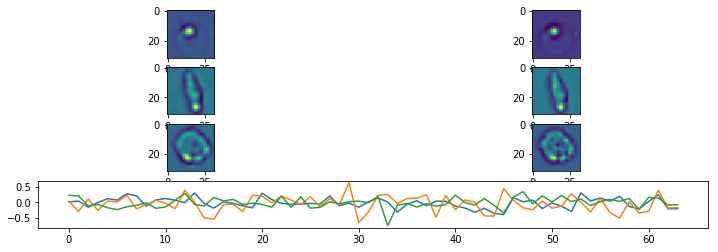

Epoch:  17 Iteration:  0 Loss:  2.430094 0.68227446 0.00077304244


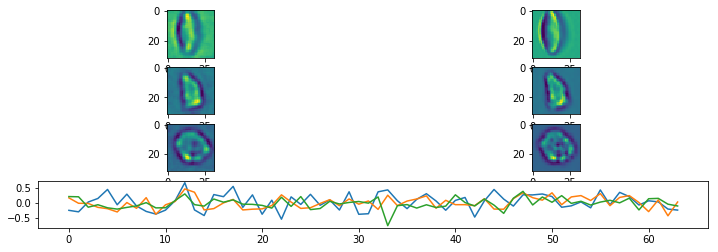

Epoch:  17 Iteration:  500 Loss:  2.346957 0.6809659 0.001596719


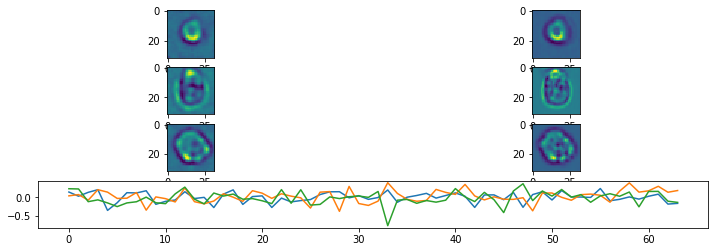

Epoch:  18 Iteration:  0 Loss:  2.3904774 0.68219924 0.0005387366


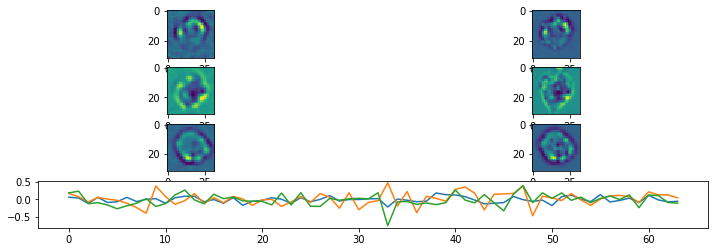

Epoch:  18 Iteration:  500 Loss:  2.3028955 0.6808614 0.0015426576


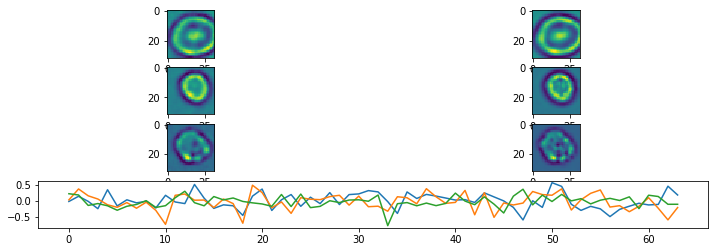

Epoch:  19 Iteration:  0 Loss:  2.374435 0.6821145 0.0005071461


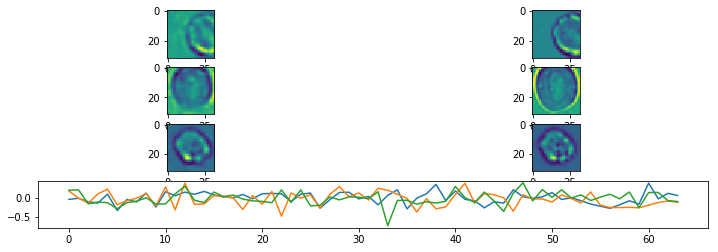

Epoch:  19 Iteration:  500 Loss:  2.2935143 0.6808462 0.0022299886


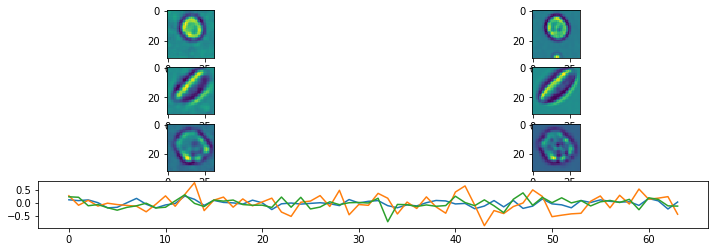

Epoch:  20 Iteration:  0 Loss:  2.3295932 0.68199086 0.0014626086


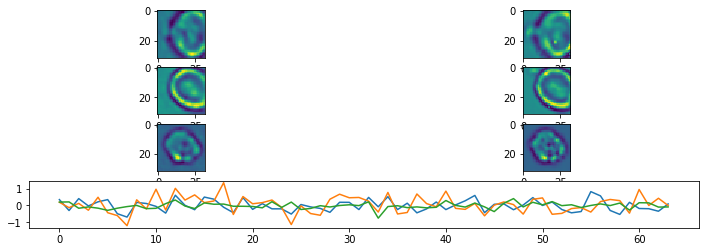

Epoch:  20 Iteration:  500 Loss:  2.247492 0.680752 0.0006868243


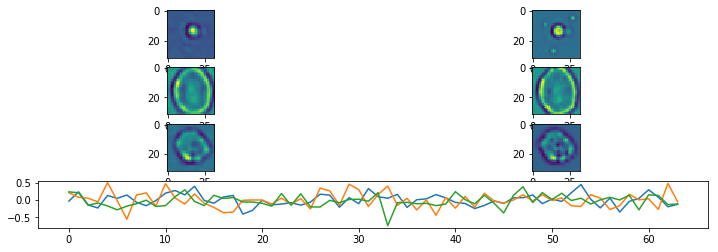

Epoch:  21 Iteration:  0 Loss:  2.3223732 0.6820077 0.0015437603


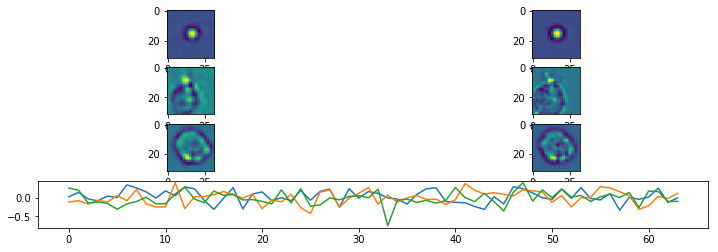

Epoch:  21 Iteration:  500 Loss:  2.2297597 0.6807027 0.001154691


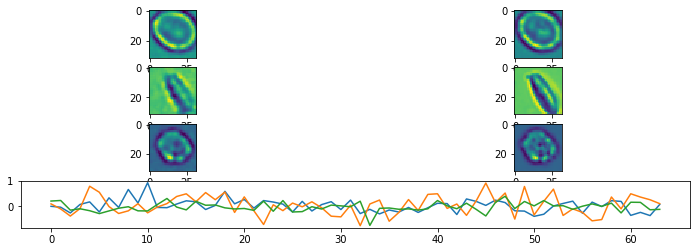

Epoch:  22 Iteration:  0 Loss:  2.2895849 0.6819387 0.0007892847


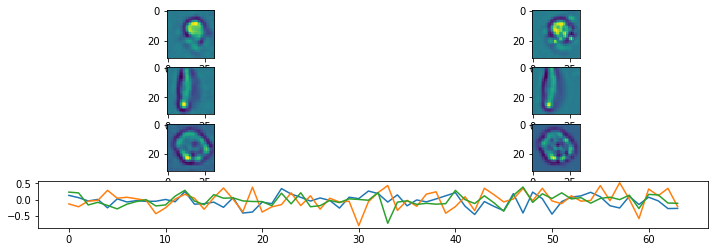

Epoch:  22 Iteration:  500 Loss:  2.2085953 0.6806345 0.0012969077


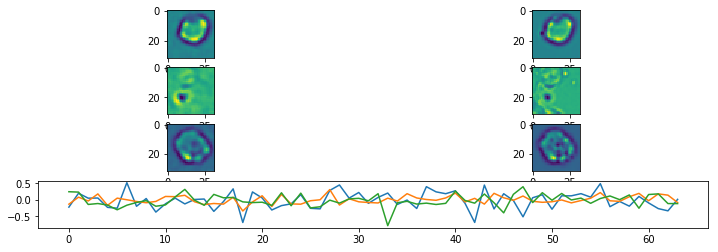

Epoch:  23 Iteration:  0 Loss:  2.2603667 0.68188953 0.0011923611


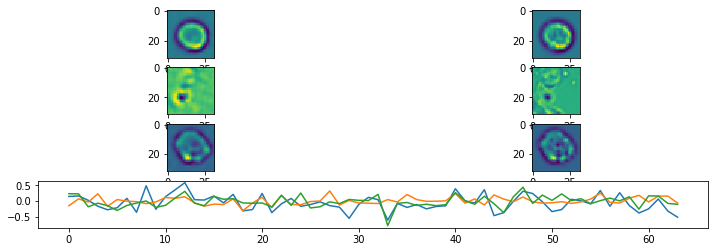

Epoch:  23 Iteration:  500 Loss:  2.2005382 0.68064725 0.0013652742


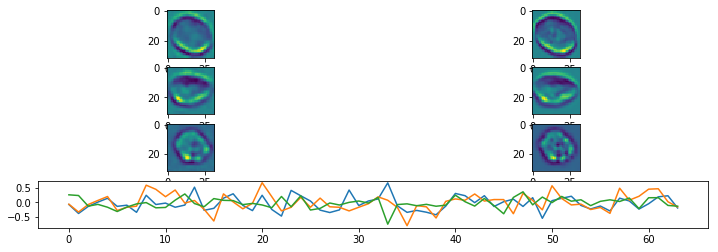

Epoch:  24 Iteration:  0 Loss:  2.2693315 0.6819088 7.4118376e-05


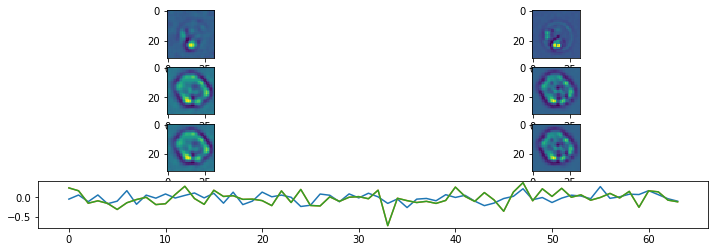

Epoch:  24 Iteration:  500 Loss:  2.1773393 0.6805473 0.0013547838


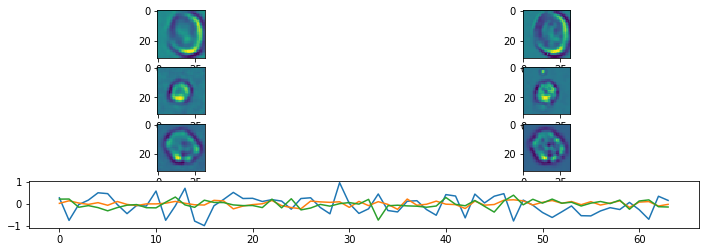

Epoch:  25 Iteration:  0 Loss:  2.2394803 0.6818104 0.0017255843


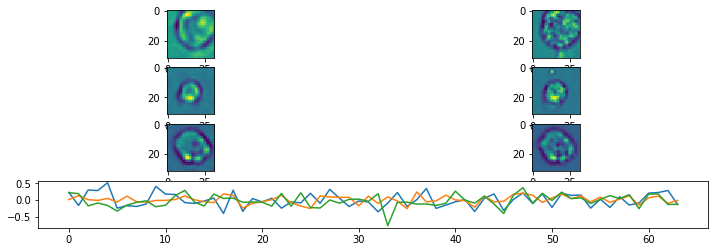

Epoch:  25 Iteration:  500 Loss:  2.1852272 0.6805595 0.0015414059


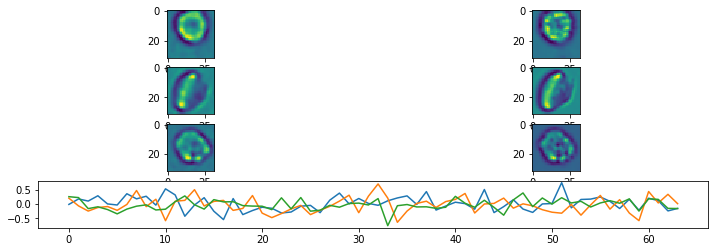

Epoch:  26 Iteration:  0 Loss:  2.231479 0.6818396 0.0003027618


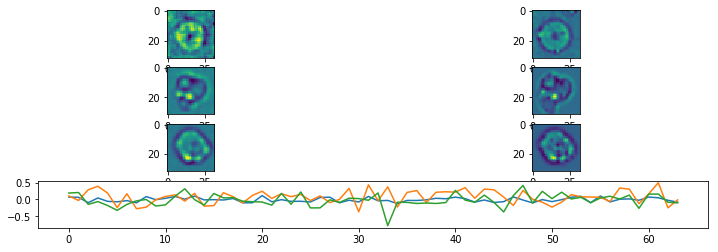

Epoch:  26 Iteration:  500 Loss:  2.1495473 0.6805471 0.000988245


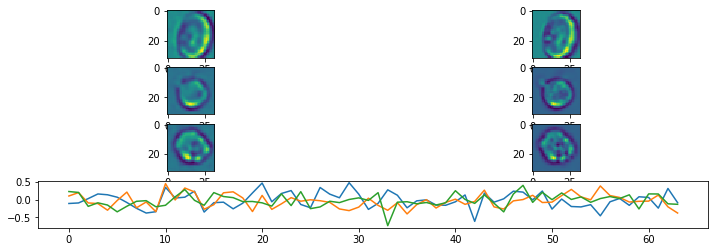

Epoch:  27 Iteration:  0 Loss:  2.2213516 0.6818167 0.0019136369


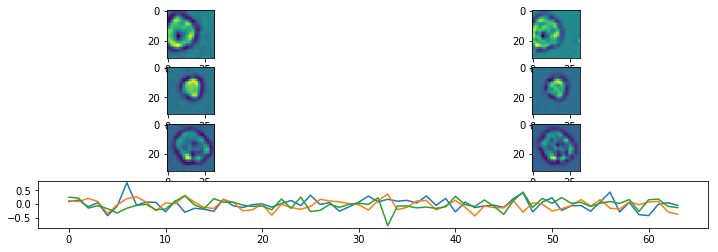

Epoch:  27 Iteration:  500 Loss:  2.1409614 0.680448 0.0007791519


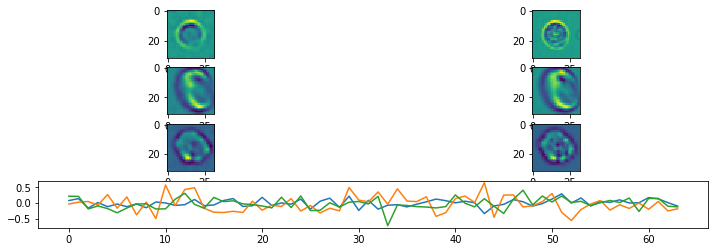

Epoch:  28 Iteration:  0 Loss:  2.1983604 0.6817394 0.0016495883


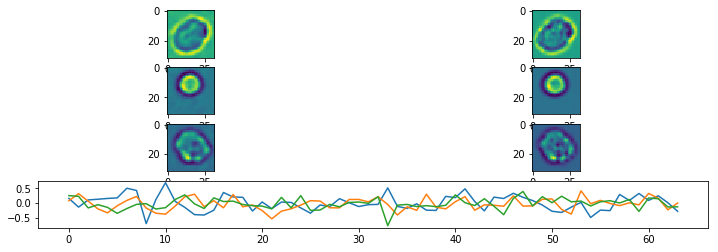

Epoch:  28 Iteration:  500 Loss:  2.1341498 0.680516 0.00059592724


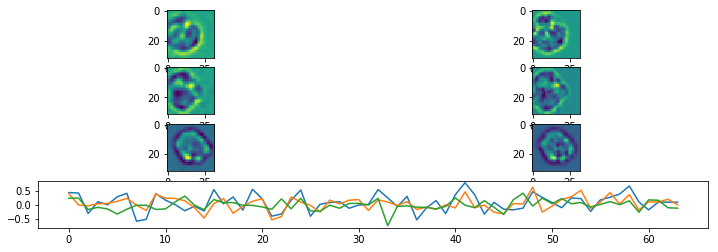

Epoch:  29 Iteration:  0 Loss:  2.1808958 0.6817237 0.00095564127


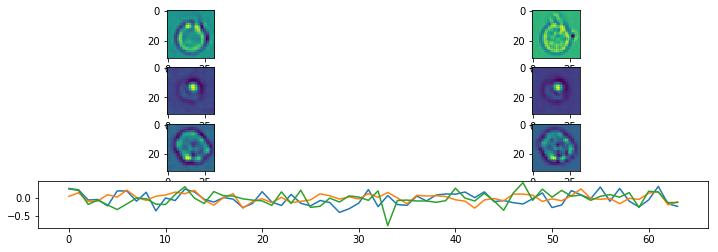

Epoch:  29 Iteration:  500 Loss:  2.1206725 0.6804856 0.00033560395


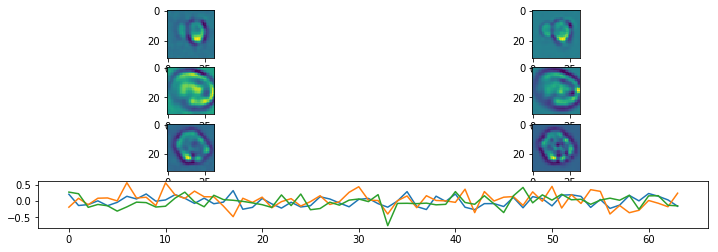

Epoch:  30 Iteration:  0 Loss:  2.1799998 0.6816994 0.001101166


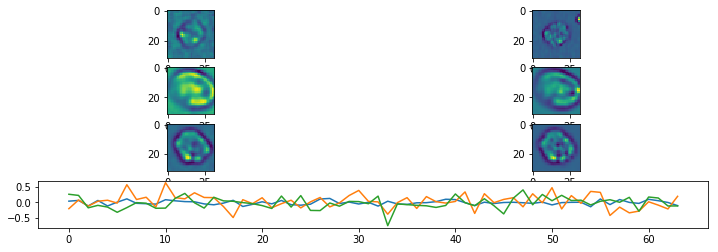

Epoch:  30 Iteration:  500 Loss:  2.1177845 0.6804212 0.00111112


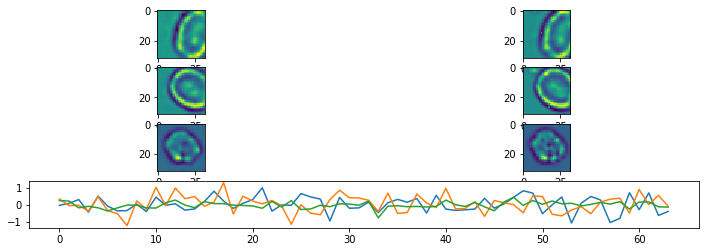

Epoch:  31 Iteration:  0 Loss:  2.1692543 0.68166757 0.0016866624


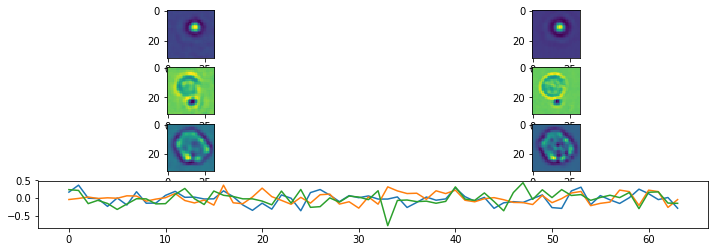

Epoch:  31 Iteration:  500 Loss:  2.108841 0.68045354 0.00019225478


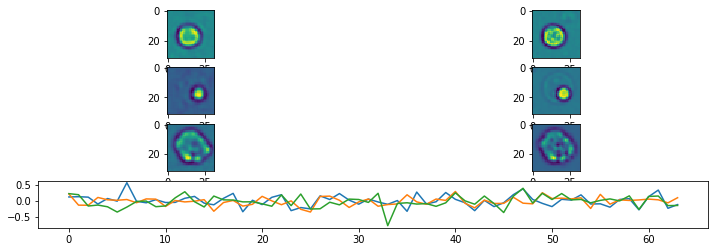

Epoch:  32 Iteration:  0 Loss:  2.1579754 0.6816363 0.0015597045


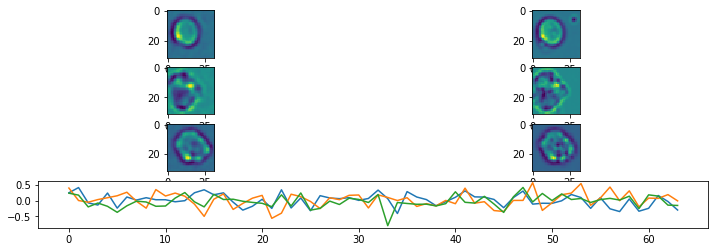

Epoch:  32 Iteration:  500 Loss:  2.101392 0.68039024 0.00086286664


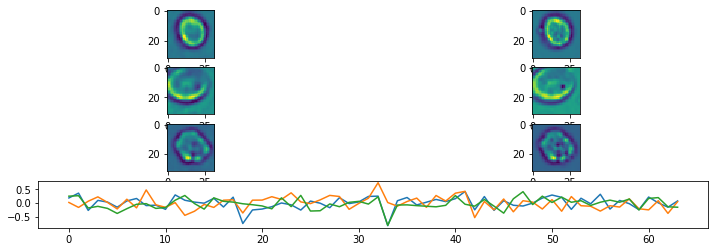

Epoch:  33 Iteration:  0 Loss:  2.1581564 0.6816523 0.0015762448


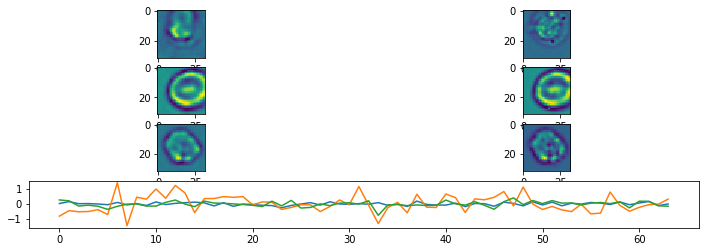

Epoch:  33 Iteration:  500 Loss:  2.0869925 0.6803789 0.0007304251


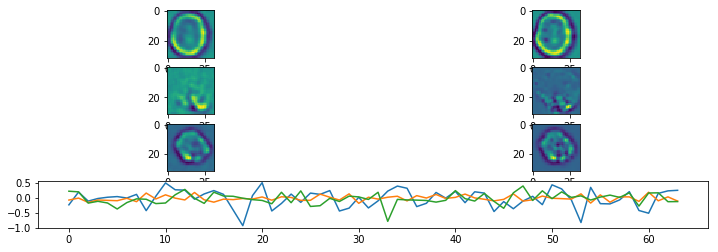

Epoch:  34 Iteration:  0 Loss:  2.13384 0.6815884 0.0012617707


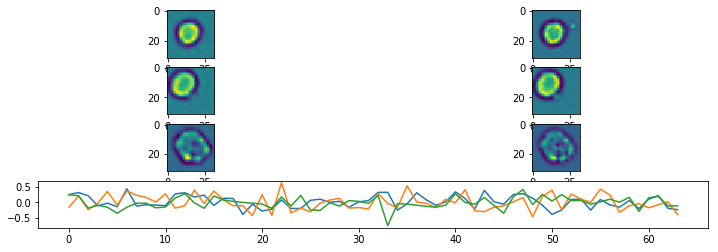

Epoch:  34 Iteration:  500 Loss:  2.0831327 0.6803858 0.0007162988


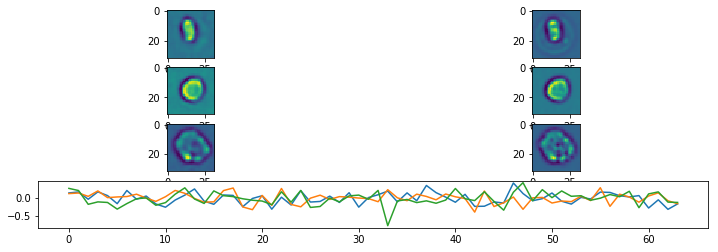

Epoch:  35 Iteration:  0 Loss:  2.1327033 0.6815661 0.0012520254


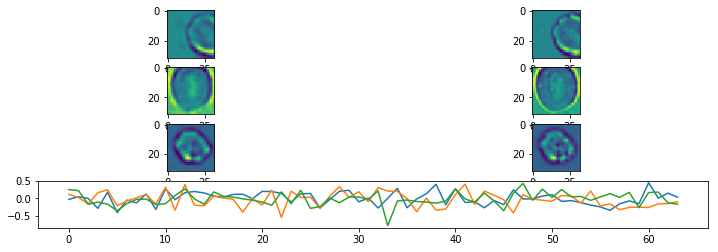

Epoch:  35 Iteration:  500 Loss:  2.0718408 0.6803472 0.0010080636


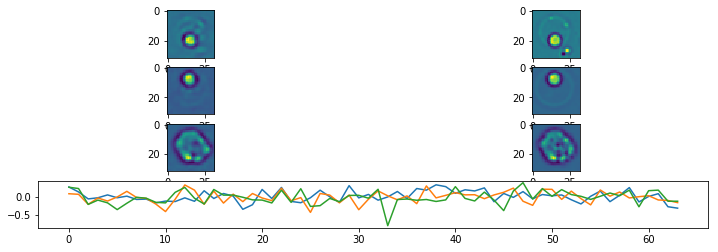

Epoch:  36 Iteration:  0 Loss:  2.1276088 0.6815835 0.0013478696


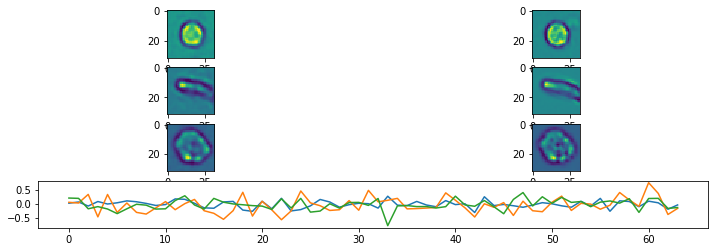

Epoch:  36 Iteration:  500 Loss:  2.0562267 0.68025494 0.0006040633


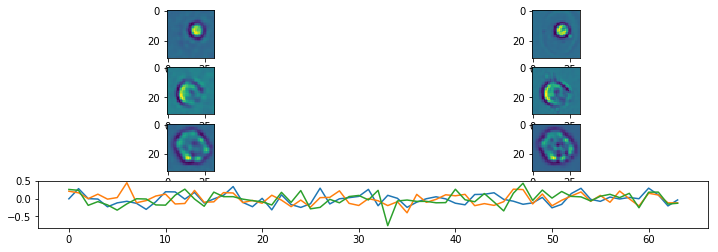

Epoch:  37 Iteration:  0 Loss:  2.1193106 0.68158215 0.0009635687


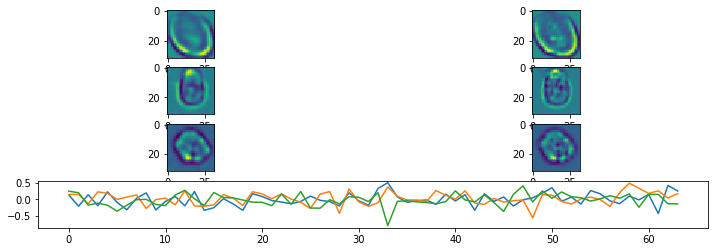

Epoch:  37 Iteration:  500 Loss:  2.0659864 0.6803498 0.00071296096


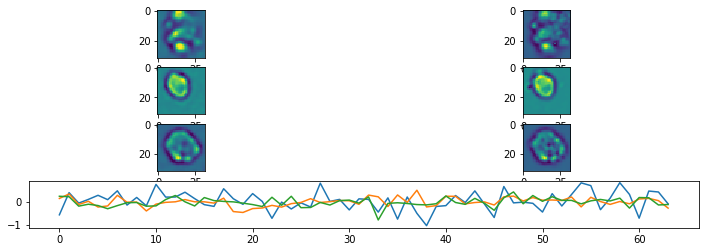

Epoch:  38 Iteration:  0 Loss:  2.1144795 0.6815685 0.0011363328


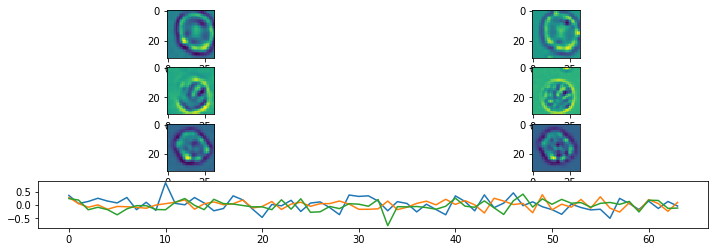

Epoch:  38 Iteration:  500 Loss:  2.0558043 0.68028855 0.0009505451


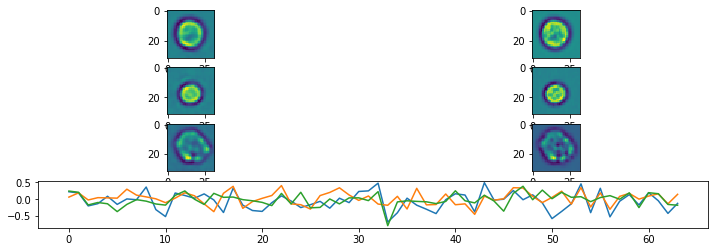

Epoch:  39 Iteration:  0 Loss:  2.1147554 0.68156254 0.0010743439


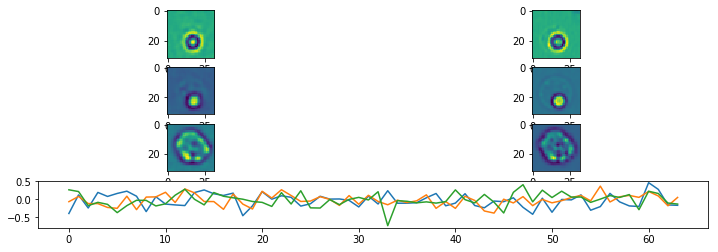

Epoch:  39 Iteration:  500 Loss:  2.0544267 0.6803451 0.00025942922


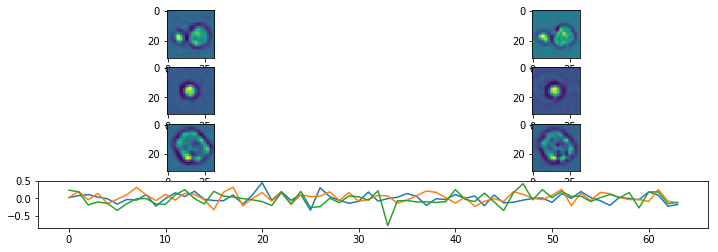

Epoch:  40 Iteration:  0 Loss:  2.0988805 0.68150264 0.0011585057


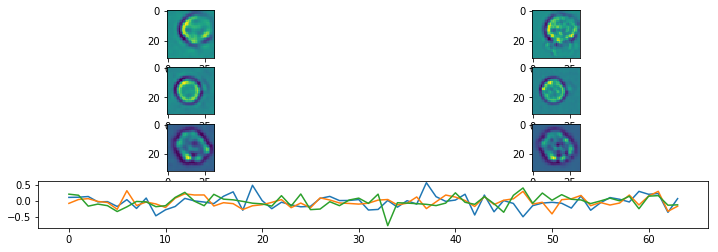

Epoch:  40 Iteration:  500 Loss:  2.0333314 0.6802927 0.0008598566


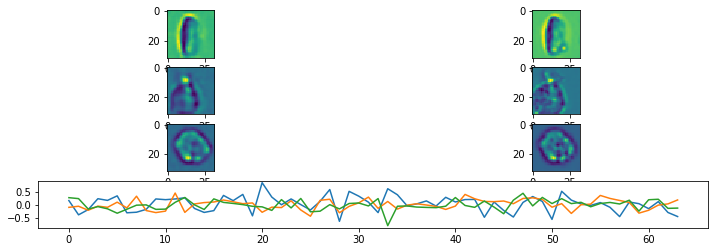

Epoch:  41 Iteration:  0 Loss:  2.0938764 0.68149424 0.0010594428


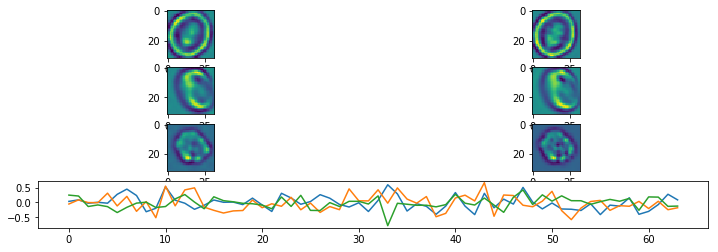

Epoch:  41 Iteration:  500 Loss:  2.0452442 0.68028307 0.0006785095


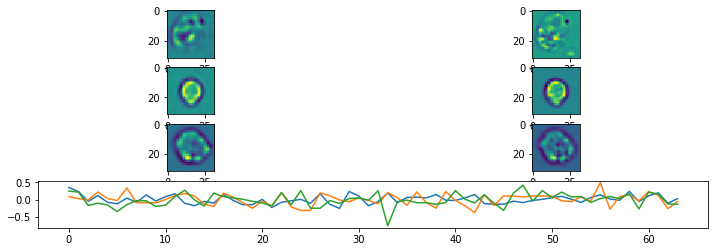

Epoch:  42 Iteration:  0 Loss:  2.09552 0.6815083 0.0010829568


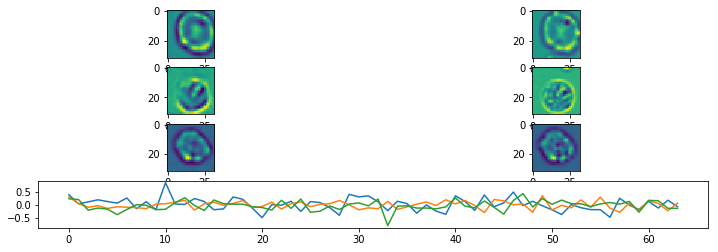

Epoch:  42 Iteration:  500 Loss:  2.0313134 0.6802538 0.00076687336


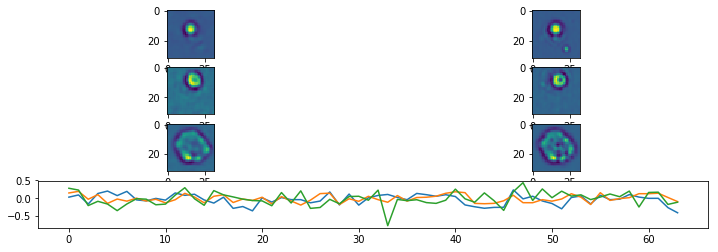

Epoch:  43 Iteration:  0 Loss:  2.0970929 0.6815332 0.0013099313


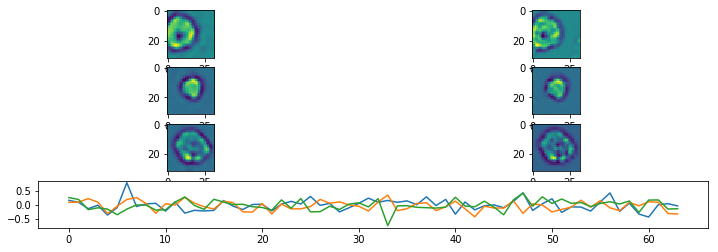

Epoch:  43 Iteration:  500 Loss:  2.028819 0.6802778 0.00093856454


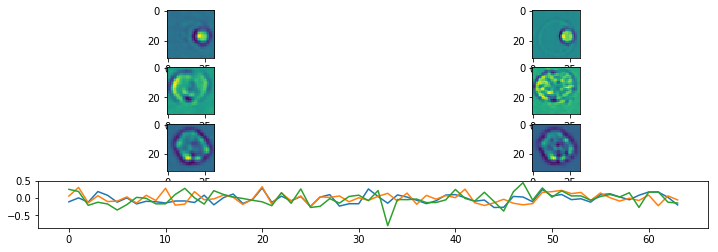

Epoch:  44 Iteration:  0 Loss:  2.0950665 0.681512 0.0020079017


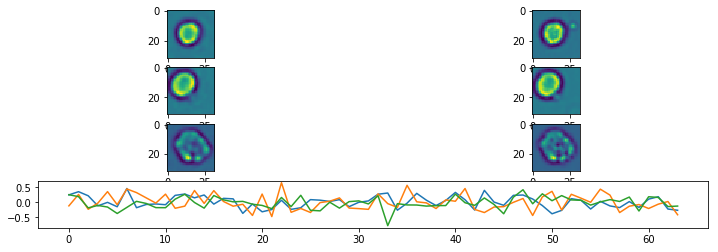

Epoch:  44 Iteration:  500 Loss:  2.019508 0.68023866 0.00037002563


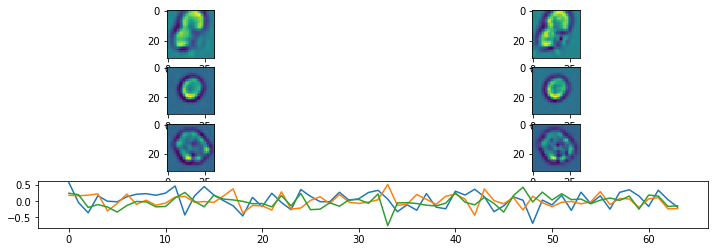

Epoch:  45 Iteration:  0 Loss:  2.0778513 0.68145853 0.0012735426


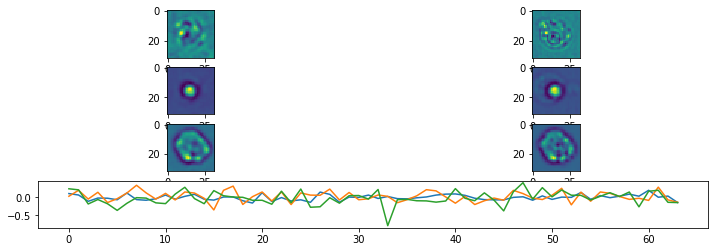

Epoch:  45 Iteration:  500 Loss:  2.0228853 0.68023854 0.0009472966


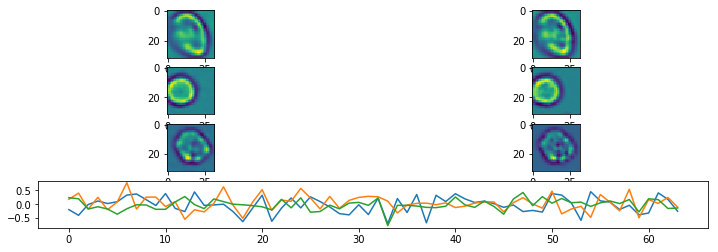

Epoch:  46 Iteration:  0 Loss:  2.0738115 0.6814891 0.001337707


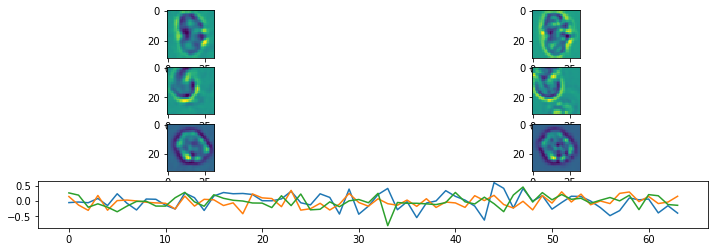

Epoch:  46 Iteration:  500 Loss:  2.0129585 0.6802163 0.0007440448


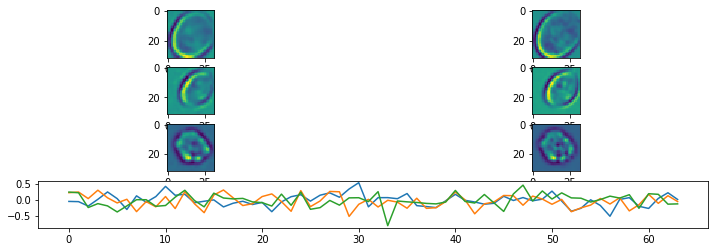

Epoch:  47 Iteration:  0 Loss:  2.0692587 0.68149173 0.0009291172


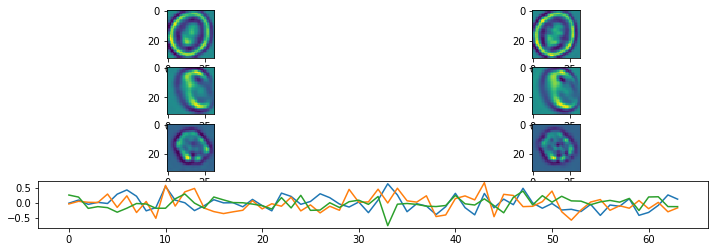

Epoch:  47 Iteration:  500 Loss:  2.0093875 0.6802064 0.0001244247


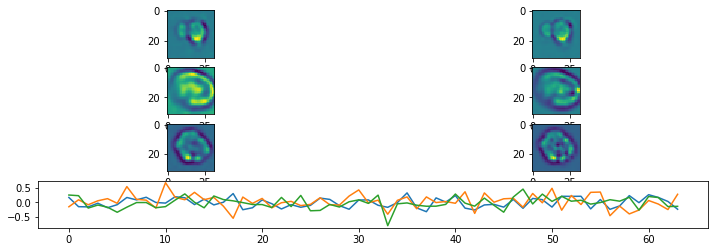

Epoch:  48 Iteration:  0 Loss:  2.063428 0.6814357 0.00083753467


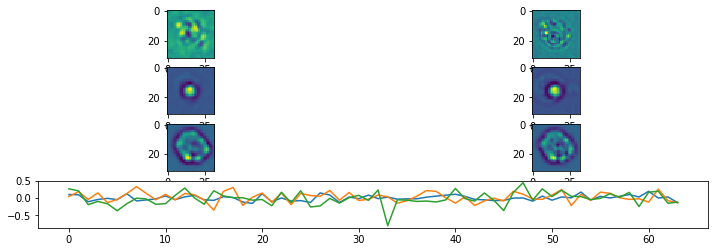

Epoch:  48 Iteration:  500 Loss:  2.0136256 0.6802155 0.0008249581


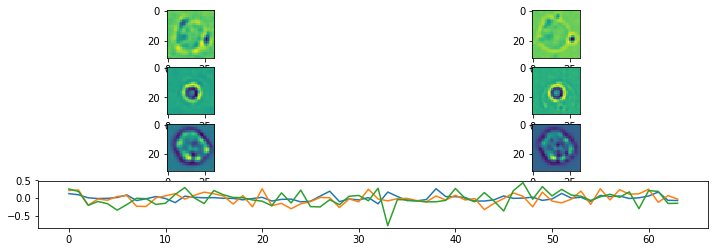

Epoch:  49 Iteration:  0 Loss:  2.0631852 0.6814437 0.0014454424


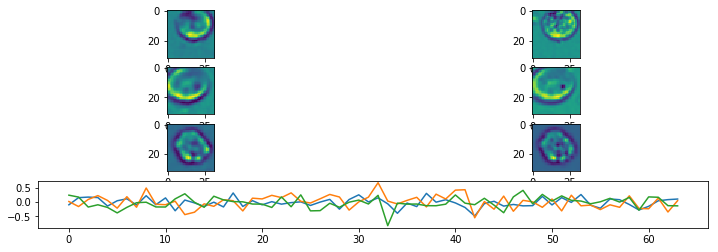

Epoch:  49 Iteration:  500 Loss:  2.006114 0.6802162 0.0006739795


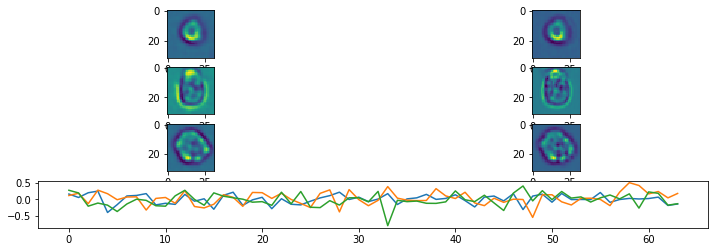

Epoch:  50 Iteration:  0 Loss:  2.0578377 0.68144727 0.0010099709


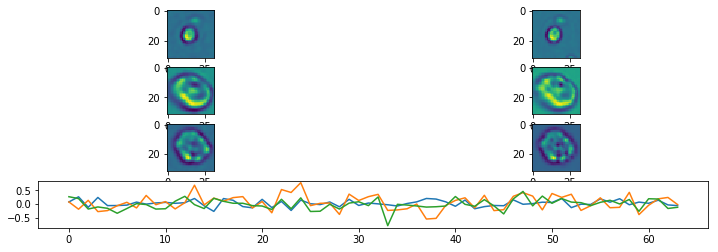

Epoch:  50 Iteration:  500 Loss:  2.0086112 0.6802263 5.6028366e-06


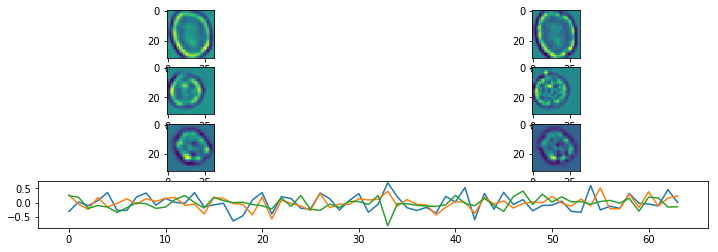

Epoch:  51 Iteration:  0 Loss:  2.0610087 0.6814548 0.0011869967


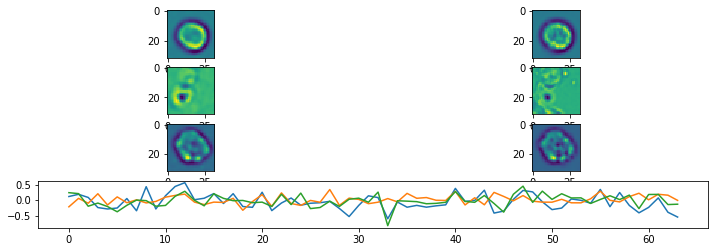

Epoch:  51 Iteration:  500 Loss:  2.004719 0.6802002 0.00065010786


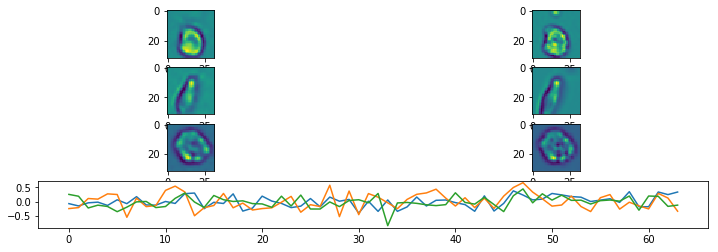

Epoch:  52 Iteration:  0 Loss:  2.0559664 0.6814353 0.0014374256


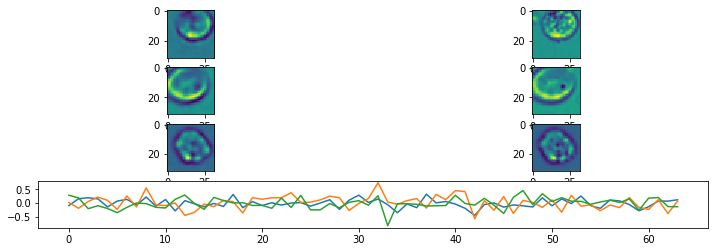

Epoch:  52 Iteration:  500 Loss:  1.9880972 0.6802063 0.00073078275


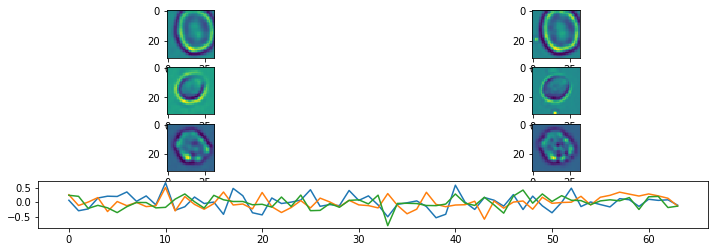

Epoch:  53 Iteration:  0 Loss:  2.0560155 0.681457 0.00095927715


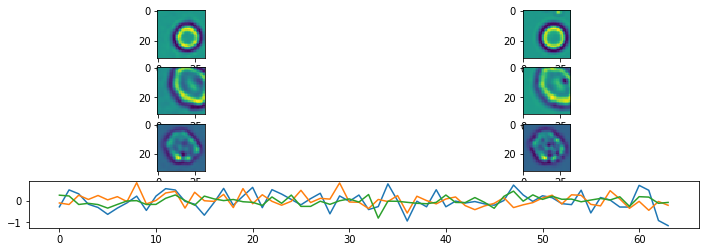

Epoch:  53 Iteration:  500 Loss:  1.9958192 0.6802216 4.7028065e-05


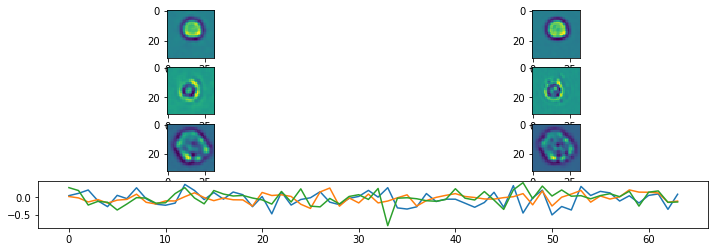

Epoch:  54 Iteration:  0 Loss:  2.0485091 0.68143743 0.00094357133


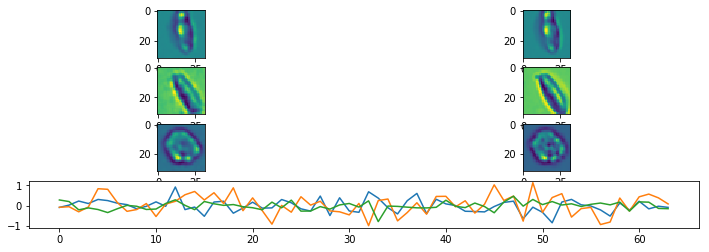

Epoch:  54 Iteration:  500 Loss:  1.9838821 0.6801273 0.0010564327


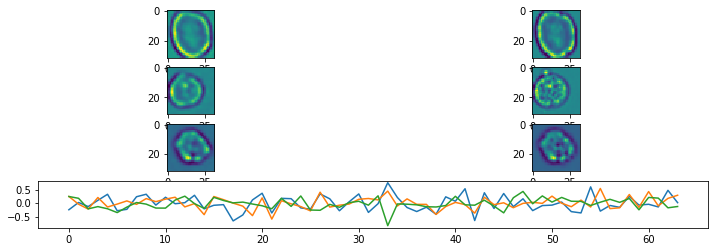

Epoch:  55 Iteration:  0 Loss:  2.0477204 0.68140054 0.0010273755


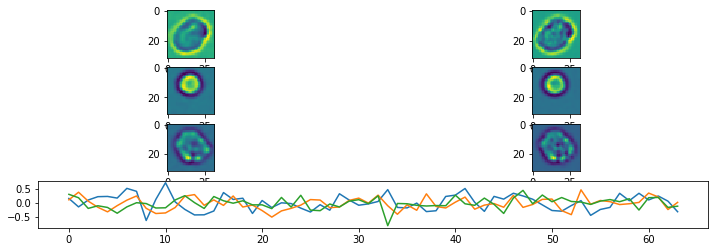

Epoch:  55 Iteration:  500 Loss:  1.9822204 0.68012077 0.00051286817


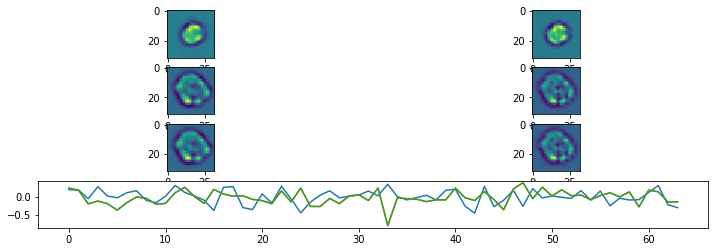

Epoch:  56 Iteration:  0 Loss:  2.0319936 0.6814028 0.00085911155


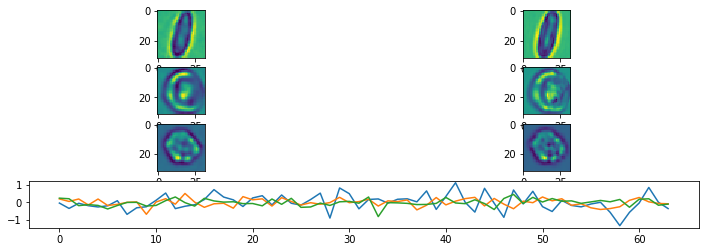

Epoch:  56 Iteration:  500 Loss:  1.9885077 0.6801624 0.00025057793


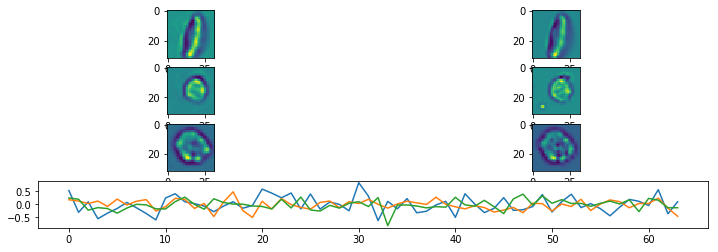

Epoch:  57 Iteration:  0 Loss:  2.0459905 0.68140507 0.0013963282


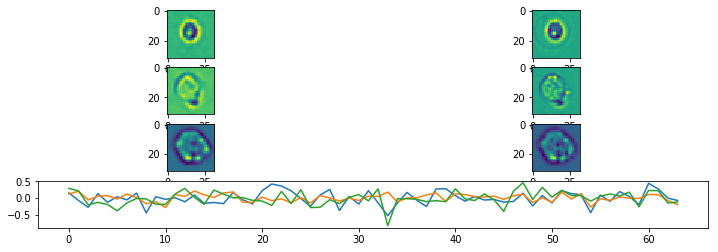

Epoch:  57 Iteration:  500 Loss:  1.9775556 0.6802031 0.0005312562


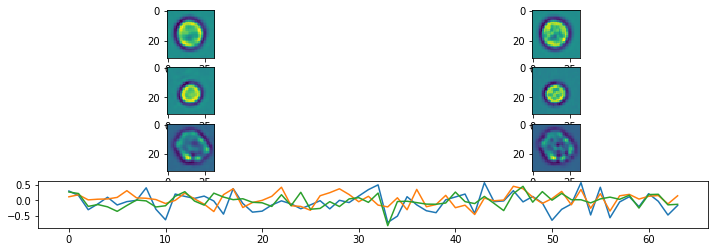

Epoch:  58 Iteration:  0 Loss:  2.046372 0.6814211 0.0007767379


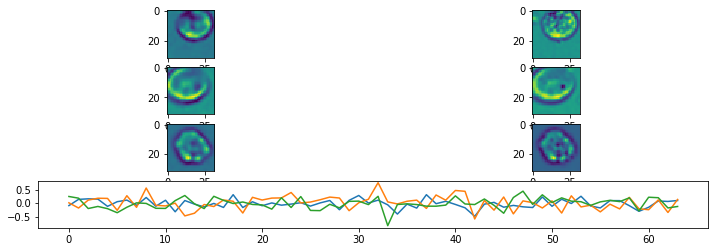

Epoch:  58 Iteration:  500 Loss:  1.9796406 0.6801275 0.0008982122


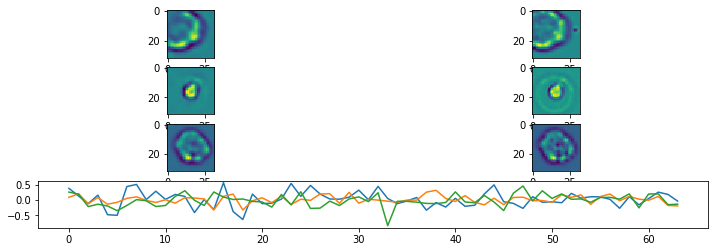

Epoch:  59 Iteration:  0 Loss:  2.0367854 0.6813872 0.00086960196


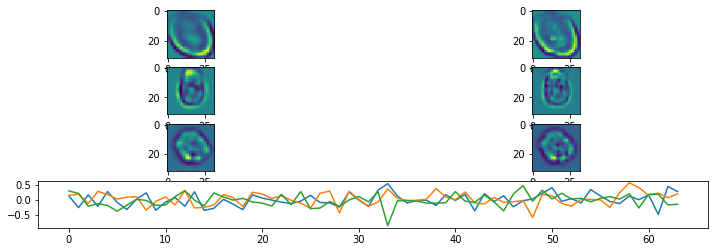

Epoch:  59 Iteration:  500 Loss:  1.9806843 0.6801485 0.0006944239


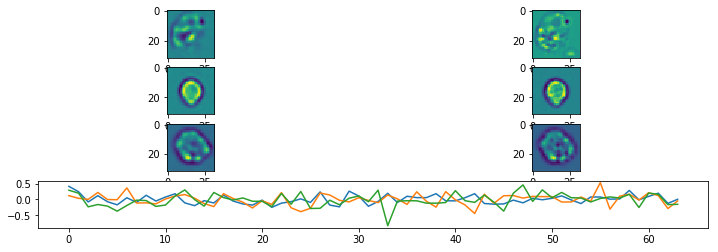

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 64 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/v/Checkpoints/Cytometry/2018-04-16-Ch0-oldnorm-32"
if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4